 # Проект "Исследование сервиса аренды самокатов GoFast"    

### Описание проекта

Цель исследования: установление взаимосвязей показателей и проверка гипотез с целью помощи развитию бизнеса.
План исследования:
1. Изучение общей информации о данных
2. Предобработка данных
3. Исследовательский анализ данных:
   - изучение параметров; 
   - изучение зависимостей между параметрами
4. Проверка гипотез
5. Оформление общего вывода


In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Шаг 1. Загрузка данных

In [2]:
#считаем CSV-файлы с данными с помощью библиотеки pandas,сохраним их в датафреймы
users = pd.read_csv('/datasets/users_go.csv')
# выведем первые строки каждого набора данных, изучим общую информацию о каждом датафрейме
users.info()
users.head(1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra


In [3]:
rides = pd.read_csv('/datasets/rides_go.csv')
rides.info()
rides.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.91914,25.599769,2021-01-01


In [4]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions.info()
subscriptions.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0


#### Шаг 2. Предобработка данных

In [5]:
# приведем столбец date к типу даты pandas:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%dT%H:%M:%S')

# создадим новый столбец с номером месяца:
rides['month'] = rides['date'].dt.month

rides.info()
rides.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


,user_id,distance,duration,date,month
0,1,4409.91914,25.599769,2021-01-01,1


In [6]:
# найдем количество пропущенных значений
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [7]:
# найдем дубликаты
users.duplicated().sum()

31

In [8]:
# удалим дубликаты
users = users.drop_duplicates()

In [9]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [10]:
rides.duplicated().sum()

0

In [11]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [12]:
subscriptions.duplicated().sum()

0

In [13]:
# Код ревьюера 

users.duplicated().sum()

0

*Вывод:*
    По результатам первичного анализа было обнаружено и устранено:
    1. Столбец date в данных приведен в типе object, был изменен к типу даты;
    2. Дубликаты в информации о пользователях (31 позиция) были устранены.

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [14]:
# узнаем частоту встречаемости городов
users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

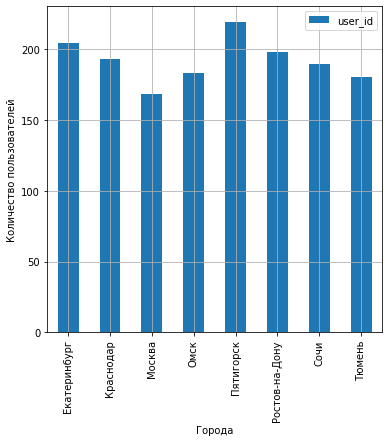

In [15]:
# построим график частоты встречаемости городов
users.pivot_table(index='city', values='user_id',aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.show()

*Вывод*: Наиболее активно пользуются арендой самокатов в Пятигорске, Екатеринбурге и Ростов-на-Дону. Меньше всего в Москве.

##### Соотношение пользователей с подпиской и без подписки

In [16]:
# узнаем соотношение пользователей с подпиской и без подписки
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

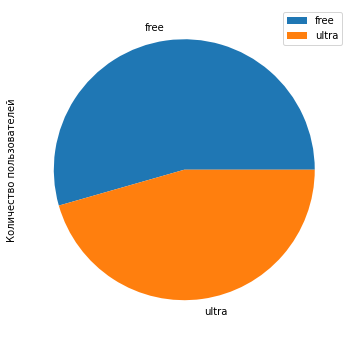

In [17]:
# построим график соотношений пользователей с подпиской и без подписки
users.pivot_table(index='subscription_type', values='user_id', aggfunc='count').plot(subplots=True,kind ='pie', figsize=(6, 6));
plt.ylabel('Количество пользователей')
plt.show()

*Вывод:* Таким образом, пользователей без подписки на 17,7% больше, чем с подпиской. 

##### Возраст пользователей

In [18]:
# узнаем возраст пользователей
users.value_counts(ascending=True).groupby('age').agg(['count'])

,count
age,
12,4
13,8
14,9
15,13
16,19
17,26
18,46
19,47
20,71


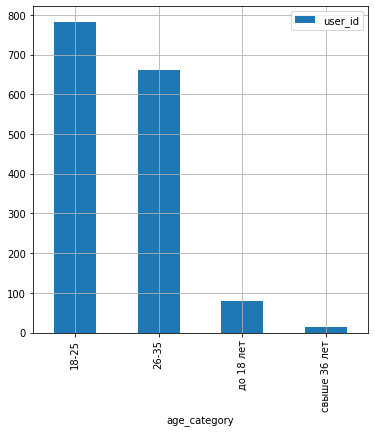

In [19]:
# сгруппируем пользователей по возрасту:
def categorize_age(age):
    if age <= 17:
        return 'до 18 лет'
    if 18<= age <= 25:
        return '18-25'
    if 26<= age <=35:
        return '26-35'
    if age >=36:
        return 'свыше 36 лет'
users['age_category'] = users['age'].apply(categorize_age)
users.pivot_table(index='age_category', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));

*Вывод* : Наибольшим спросом аренда самокатов пользуется у возрастной группы от 18 до 25лет, немного уступает в количестве пользователей группа от 26 до 35 лет. И меньше всего используют самокаты пользователи старше 36 лет. 

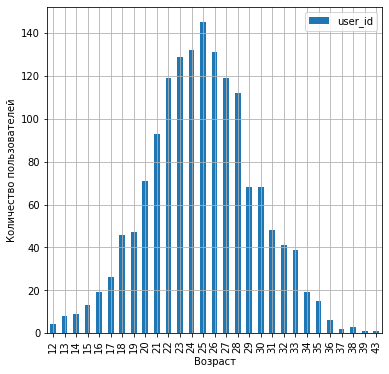

In [20]:
users.pivot_table(index='age', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

##### Расстояние, которое пользователь преодолел за одну поездку

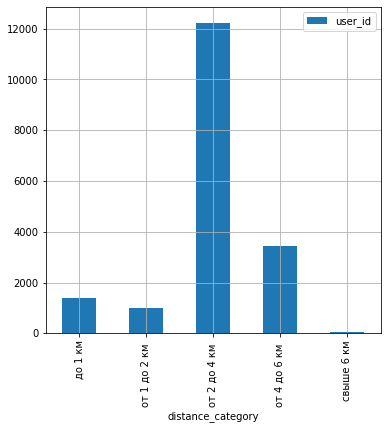

In [21]:
# сгруппируем расстояния:
def categorize_distance(distance):
    if distance < 1000:
        return 'до 1 км'
    if 1000 <= distance <= 2000:
        return 'от 1 до 2 км '
    if 2000.000001 <= distance <=4000:
        return 'от 2 до 4 км '
    if 4000.000001 <= distance <=6000:
        return 'от 4 до 6 км '
    if distance >=6000.000001:
        return 'свыше 6 км'
rides['distance_category'] = rides['distance'].apply(categorize_distance)
rides.pivot_table(index='distance_category', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));

*Вывод:* Подавляющее большинство поездок совершается на расстояние от 2 до 4 км. Расстояние свыше 6 км на самокате практически не преодолевается.

In [ ]:
rides.pivot_table(index='distance', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.show()

#####  Продолжительность поездок

In [ ]:
rides['duration'].max()

In [ ]:
# сгруппируем расстояния:
def categorize_duration(duration):
    if duration < 1:
        return 'меньше 1 минуты'
    if 1 <= duration <= 15:
        return 'от 1 до 15 минут '
    if 15.000001 <= duration <=25:
        return 'от 15 до 25 минут '
    if 25.000001 <= duration <=35:
        return 'от 25 до 35 минут '
    if duration >=35.000001:
        return 'свыше 35 мин'
rides['duration_category'] = rides['duration'].apply(categorize_duration)
rides.pivot_table(index='duration_category', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));

*Вывод:* Наибольшее количество поездок занимают от 15 до 25 минут. Свыше 35 минут поездок очень мало.

In [ ]:
<div class="alert alert-info"> <b>Комментарий студента:</b>

In [ ]:
rides.pivot_table(index='duration', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));
plt.xlabel('Время поездки')
plt.ylabel('Количество пользователей')
plt.show()

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [ ]:
users_rides = users.merge(rides,on='user_id', how='left')
users_rides.head()

In [ ]:
users_rides_subscriptions = users_rides.merge(subscriptions,on='subscription_type', how='left')
users_rides_subscriptions.head()

In [ ]:
users_rides_subscriptions.isna().sum()

##### Создим ещё два датафрейма из датафрейма, созданного на этапе 4.1

In [ ]:
# c данными о пользователях без подписки
users_rides_subscriptions_free = users_rides_subscriptions[users_rides_subscriptions ['subscription_type']=='free']
users_rides_subscriptions_free.head()

In [ ]:
# c данными о пользователях c подпиской
users_rides_subscriptions_ultra = users_rides_subscriptions[users_rides_subscriptions ['subscription_type']=='ultra']
users_rides_subscriptions_ultra.head()

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий

In [ ]:
# расстояние, которое преодолевают пользователи без подписки
users_rides_subscriptions_free.pivot_table(index='distance_category', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));

In [ ]:
# время поездок пользователей без подписки
users_rides_subscriptions_free.pivot_table(index='duration_category', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));

*Вывод:* Пользователи без подписки в большинстве ездят от 15 до 25 мин на расстояния от 2 до 4 км.

In [ ]:
# расстояние, которое преодолевают пользователи с подпиской
users_rides_subscriptions_ultra.pivot_table(index='distance_category', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));

In [ ]:
# время поездок пользователей c подпиской
users_rides_subscriptions_ultra.pivot_table(index='duration_category', values='user_id', aggfunc='count').plot(grid=True,kind ='bar', figsize=(6, 6));

*Вывод:* Пользователи с подпиской реже ездят на расстояния меньше 1 км, в основном от 2 до 6 км. за время от 15 до 25 мин.И в этой группе не встречаются поездки меньше 1 мин. 

#### Шаг 5. Подсчёт выручки

#####  Создим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [ ]:
# каждое значение из столбца duration округлим с помощью «потолка»: 
users_rides_subscriptions['duration'] = np.ceil(users_rides_subscriptions['duration']) 
users_rides_subscriptions.head()

In [ ]:
agreg = users_rides_subscriptions.groupby(['user_id',users_rides_subscriptions['date'].dt.month]).agg({'distance':'sum', 'duration':['sum', 'count'],
                                  'subscription_type':'first',
                                  'minute_price':'first',
                                  'start_ride_price':'first',
                                  'subscription_fee':'first'}).reset_index()
agreg.head()

In [ ]:
# Переименуем столбцы
agreg.columns = ['user_id','date','sum_distance', 'sum_duration', 'count_rides',
                         'subscription_type', 'minute_price',
                         'start_ride_price', 'subscription_fee']
agreg.reset_index(inplace=True)
agreg.head()

##### Рассчитаем помесячную выручку, которую принёс каждый пользователь

In [ ]:
#расчёт выручки
def monthly_revenue(row):
    return row['start_ride_price'] * row['count_rides'] + row['minute_price'] * row['sum_duration'] + row['subscription_fee']
 
agreg['monthly_revenue'] = agreg.apply(monthly_revenue, axis=1)
agreg.head()

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Нулевая гипотеза (Н0): Среднее время поездки у пользователей с подпиской и без подписки одинаковое. 
Альтернативная гипотеза (Н1): Среднее время поездки у пользователей с подпиской больше, чем у пользователей без подписки.

In [ ]:
ultra =users_rides_subscriptions[users_rides_subscriptions['subscription_type'] == 'ultra'] 
free = users_rides_subscriptions[users_rides_subscriptions['subscription_type'] == 'free'] 

sample_ultra = ultra['duration'] 
sample_free = free['duration']

alpha = 0.05

results = st.ttest_ind(sample_ultra, sample_free, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
   
print('Средняя длительность поездки Ultra',sample_ultra.mean())
print('Средняя длительность поездки Free',sample_free.mean() )

*Вывод:* Средняя длительность поездки с подпиской превышает среднюю длительность поездки без подписки. Таким образом, мы можем сказать, что пользователи с подпиской тратят больше времени на поездки.

##### Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Нулевая гипотеза (Н0): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 
Альтернативная гипотеза (Н1): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров. 

In [ ]:
ultra = users_rides_subscriptions[users_rides_subscriptions['subscription_type'] == 'ultra'] 

sample_1_ultra = ultra['distance'] 
sample_1 = 3130

alpha = 0.05

results = st.ttest_1samp(sample_1_ultra, sample_1, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
   
print('Среднее расстояние, которое проезжают пользователи с Ultra',sample_1_ultra.mean())


*Вывод:* Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 

##### Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

H0 - Месячная выручка от пользователей с подпиской такая же как у пользователей без подписки.
H1 - Месячная выручка от пользователей с подпиской не равна месячной выручке у пользователей без подписки.

In [ ]:
ultra_revenue = agreg.query('subscription_type == "ultra"')['monthly_revenue']
free_revenue = agreg.query('subscription_type == "free"')['monthly_revenue']

alpha = 0.05

results = st.ttest_ind(ultra_revenue, free_revenue, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
   
print('Средняя месячная выручка пользователей Ultra',ultra_revenue.mean())
print('Средняя месячная выручка пользователей Free',free_revenue.mean() )

*Вывод:* Месячная выручка от пользователей с подпиской не равна месячной выручке у пользователей без подписки. И в среднем значении превышает ее.

##### Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение

H0 - Количество обращений осталось таким же как и до обновления.
H1 - Количество обращений снизилось после обновления.

Предположим, что обновление было введено с 26.10.2023 г.

In [ ]:
before_update = df[df['Period'] < pd.to_datetime('2023-10-26')]
after_update = df[df['Period'] >= pd.to_datetime('2023-10-26')]

before = before_update['contacting'] 
after = after_update['contacting'] 

alpha = 0.05

results = st.ttest_ind(before, after, alternative = 'less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
   
print('Среднее количество обращений до обновления',before.mean())
print('Среднее количество обращений после обновления',after.mean() )

#### Общий вывод


##### Описание проекта: 
На основании данных о некоторых пользователях популярного сервиса аренды самокатов GoFast из нескольких городов было необходимо провести анализ и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

##### Порядок обработки аномалий, пропусков и дубликатов, предобработка данных для анализа:
В процессе ознакомления с данными было установлено наличие дубликатов в данных пользователей, которые были удалены.

#####  Анализ:
В ходе анализа были сделаны следующие выводы:
- наиболее активно пользуются арендой самокатов в Пятигорске, Екатеринбурге и Ростов-на-Дону. Меньше всего в Москве;
- пользователей без подписки на 17,7% больше, чем с подпиской;
- наибольшим спросом аренда самокатов пользуется у возрастной группы от 18 до 25лет, немного уступает в количестве пользователей группа от 26 до 35 лет. И меньше всего используют самокаты пользователи старше 36 лет. 
- подавляющее большинство поездок совершается на расстояние от 2 до 4 км. Расстояние свыше 6 км на самокате практически не преодолевается. 
- наибольшее количество поездок занимают от 15 до 25 минут. Свыше 35 минут поездок очень мало.
- средняя длительность поездки с подпиской превышает среднюю длительность поездки без подписки. Таким образом, мы можем сказать, что пользователи с подпиской тратят больше времени на поездки.
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 
- месячная выручка от пользователей с подпиской не равна месячной выручке у пользователей без подписки. И в среднем значении превышает ее.